In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from math import sqrt
%matplotlib inline

In [2]:
data = pd.read_csv("homicide.csv")
print(data.shape)
age = data.age
deaths = data.num_homicide_deaths
age = age.values.reshape(-1,1)
deaths = deaths.values.reshape(-1,1)
train_data,test_data = train_test_split(data, test_size = .2)
train_data_age = train_data.age
train_data_deaths = train_data.num_homicide_deaths
test_data_age = test_data.age
test_data_deaths = test_data.num_homicide_deaths
train_data_age = train_data_age.values.reshape(-1,1)
train_data_deaths = train_data_deaths.values.reshape(-1,1)
test_data_age = test_data_age.values.reshape(-1,1)
test_data_deaths = test_data_deaths.values.reshape(-1,1)
test_data.head()

(30, 2)


,age,num_homicide_deaths
2,23,653
24,45,254
11,32,449
15,36,362
22,43,253


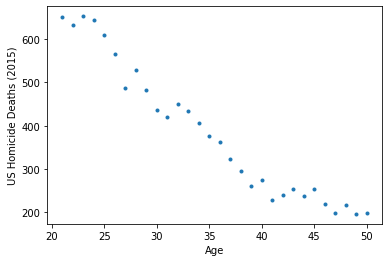

In [3]:
plt.plot(data.age, data.num_homicide_deaths,'.')
plt.xlabel('Age')
plt.ylabel('US Homicide Deaths (2015)')
plt.show()

983.8536498621855 -17.00173379567885
SSt: 709936.1666666667
RSS 39912.905365244515
SSR 670023.2613014223
R_squared 0.9437795857722732


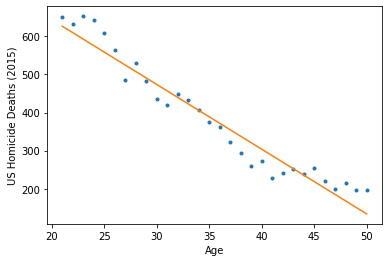

In [4]:
## using closed-form solution
def simple_linear_regression(input_feature, output):
    # compute the sum of input_feature and output
    input_feature_sum = input_feature.sum()
    output_sum = output.sum()
    input_feature_mean = input_feature.mean()
    
    # compute the product of the output and the input_feature and its sum
    output_input_product = input_feature*output
    output_input_product_sum = output_input_product.sum()
    
    # compute the squared value of the input_feature and its sum
    squared_input = input_feature * input_feature
    squared_input_sum = squared_input.sum()
    
    # use the formula for the slope
    ### using closed form solution
    slope = (output_input_product_sum-((input_feature_sum*output_sum)/len(input_feature)))/(squared_input_sum-((input_feature_sum*input_feature_sum)/len(input_feature)))
    ### using correlation furmula
#     slope = ((input_feature-input_feature_mean) * (output - output.mean())).sum()/((input_feature-input_feature_mean)**2).sum()
    
    
    # use the formula for the intercept
    intercept = (output_sum - (slope * input_feature_sum))/len(input_feature)
    
    return (intercept, slope)

intercept,slope = simple_linear_regression(train_data_age, train_data_deaths)
print(intercept, slope)

def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + (input_feature * slope)
    
    return predicted_values

def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    predicted_values = intercept + (input_feature * slope)

    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - predicted_values

    # square the residuals and add them up
    residuals_product = residuals * residuals
    RSS = residuals_product.sum()

    return RSS 

def total_sum_of_squares(output_feature):
    SST = 0
    error= (output_feature - output_feature.mean())**2
    SST = error.sum()
    return SST

SST = total_sum_of_squares(deaths)
SSE = get_residual_sum_of_squares(age, deaths, intercept, slope)
SSR = SST - SSE
R_squared = (SSR / (SSR + SSE))

print ('SSt:',SST)
print ('RSS', SSE)
print ('SSR', SSR)
print ('R_squared', R_squared)

prediction_ = get_regression_predictions(test_data_age,intercept,slope)
prediction = get_regression_predictions(age, intercept, slope)
# print(prediction_)
# print(test)
# plt.plot(prediction, prediction_)
plt.plot(age,deaths, '.')
plt.plot(age, prediction)
plt.xlabel('Age')
plt.ylabel('US Homicide Deaths (2015)')
plt.show()

In [5]:
def get_numpy_data(data, features, output):
    #add a constant column
    data = data.copy()
    data['constant'] = 1
    features = ['constant'] + features
    data_features = data[features]
    feature_matrix = data_features.values
    output_array = data[output]
    output_matrix = output_array.values
    return (feature_matrix, output_matrix)

In [6]:
def predict_output(feature_matrix, weights):
     # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [7]:
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(errors, feature)
    return derivative

In [8]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, epoch):
    weights = np.array(initial_weights) # make sure it's a numpy array
    for i in range(epoch):
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            derivative = feature_derivative(errors, feature_matrix[:, i])
            # subtract the step size times the derivative from the current weight
            weights[i]= weights[i] - (step_size * derivative)
            # add the squared value of the derivative to the gradient sum of squares (for assessing convergence)
            derivative_square = derivative * derivative 
            gradient_sum_squares = derivative_square.sum()
    return(weights)  

(30, 1)
[962.90620181 -16.35699818]


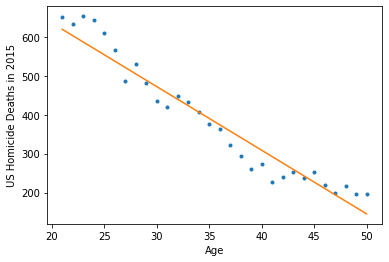

prediction:  [586.69524357 226.84128351 439.48225991 374.05426717 259.55527988
 504.91025264]
prediction_sum:  2391.5385866652186
output:  2500


In [9]:
# using gradient descent as simple regression
simple_features = ['age']
my_output = 'num_homicide_deaths'
(simple_feature_matrix, output) = get_numpy_data(data, simple_features, my_output)
initial_weights = np.array([0., 1.])
step_size = 10e-7
epoch = 1000000

print(simple_feature_matrix[:150,[1]].shape)

test_weight = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, epoch)
print (test_weight)

(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
prediction = predict_output(test_simple_feature_matrix, test_weight)
prediction_train = predict_output(simple_feature_matrix, test_weight)
plt.plot(simple_feature_matrix[:,[1]] , output, '.')
plt.plot(simple_feature_matrix[:,[1]], prediction_train)
plt.xlabel('Age')
plt.ylabel('US Homicide Deaths in 2015')
plt.show()
print ('prediction: ',prediction)
print ('prediction_sum: ',prediction.sum())
print ('output: ',test_output.sum())